# HW1 - TEAM7

## SET UP

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import plot_confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

## EXPLORATION AND CLEANING

In [ ]:
# import data from csv
churn = pd.read_csv('C:/Users/Will Jiang/Desktop/Emory Desktop/BA/HW/HW1/HW1_Data.csv')

In [ ]:
# data exploration
churn.head(10)

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,83.53,20.00,1.00,31,745,1,0,0,0,0,4,1
1,29.99,0.00,0.00,52,1441,0,0,0,1,1,3,1
2,37.75,2.67,0.00,25,572,0,0,0,1,1,3,1
3,5.25,0.00,0.00,45,1354,0,0,0,0,0,2,1
4,42.71,8.67,0.00,27,224,1,0,0,0,0,3,1
5,53.69,15.00,2.33,23,267,1,0,0,0,1,3,1
6,33.66,8.33,0.00,31,933,1,0,0,0,0,2,1
7,52.56,80.00,31.67,33,402,1,0,0,0,1,3,1
8,22.50,8.67,2.67,37,243,1,0,0,0,0,3,1
9,98.47,24.67,3.33,35,13,0,0,1,1,1,3,1


In [ ]:
churn.describe()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
count,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000,31891.000000
mean,58.665179,24.951385,8.065277,18.761908,391.222633,0.894704,0.363175,0.057163,0.184817,0.676931,0.044088,0.497162
std,44.163859,34.790147,16.610589,9.548019,254.998478,0.306939,0.480922,0.232158,0.388155,0.467656,0.224552,0.500000
min,-5.860000,0.000000,0.000000,6.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.450000,3.000000,0.000000,11.000000,212.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.380000,13.330000,2.000000,17.000000,341.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,71.040000,33.330000,9.000000,24.000000,530.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,861.110000,610.330000,404.000000,60.000000,1812.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
churn.shape

(31891, 12)

In [ ]:
# cleaning data
churn = churn.drop(churn[churn.revenue<0].index) #drop samples with negative revenue
churn = churn.drop(churn[churn.eqpdays<0].index) #drop samples with negative eqpdays

In [ ]:
churn.shape

(31844, 12)

In [ ]:
# dictinct input data and target
churn_target = churn.iloc[:,11]
churn_data = churn.iloc[:,0:11]
churn_target_names = ['churn','non-churn']
churn_feature_names = list(churn_data)

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(churn_data, churn_target, random_state=42, test_size =0.3)
#train_test_split performs shuffling by default

In [ ]:
# model training
tree_clf1 = DecisionTreeClassifier(max_depth=None, criterion='entropy')
tree_clf1= tree_clf1.fit(X_train, y_train)

## VISUALIZATION AND EVALUATION

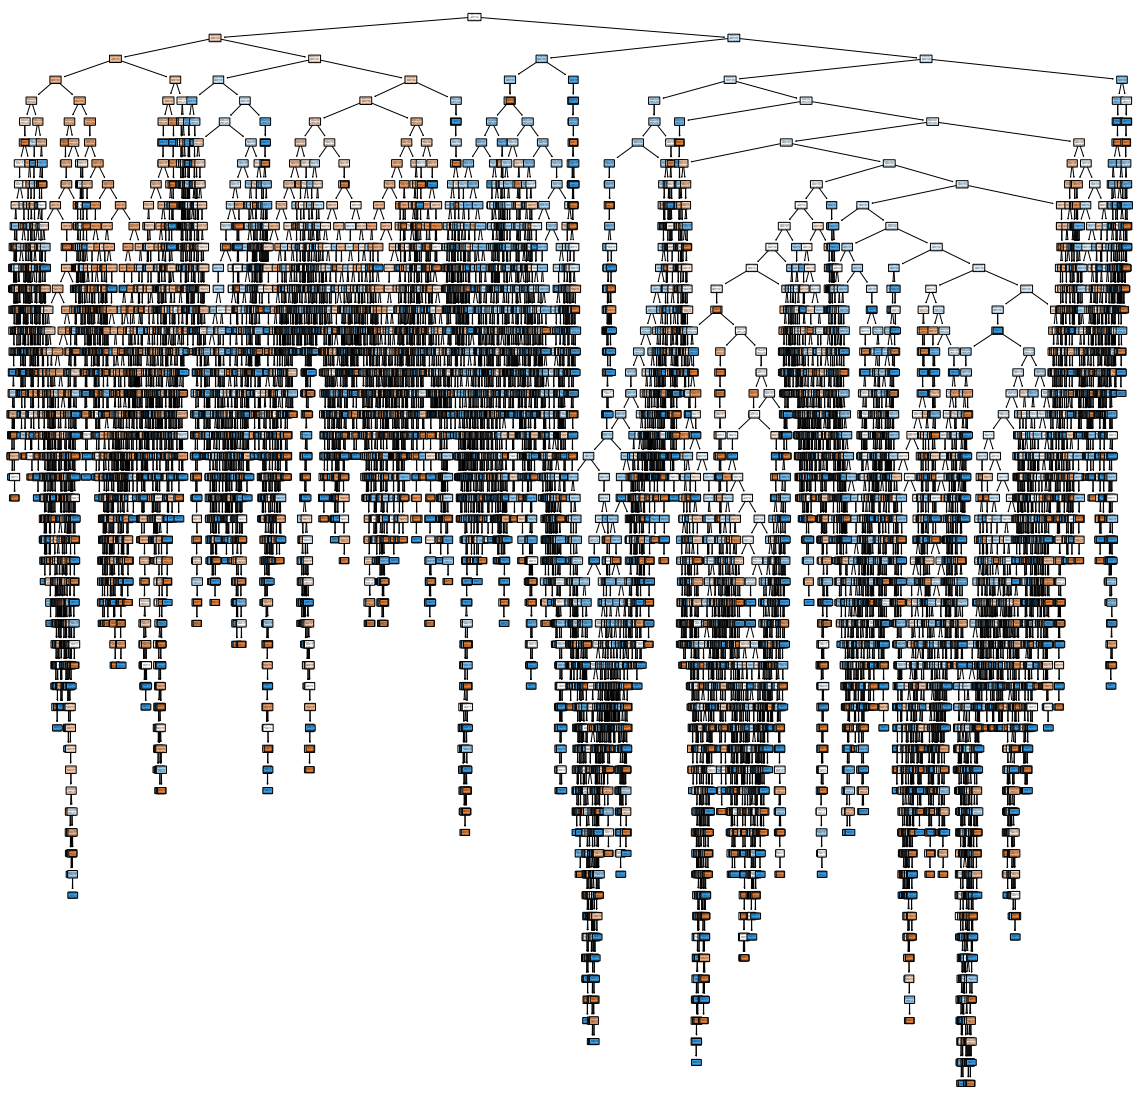

In [ ]:
# plot decision tree
fig1 = plt.figure(1,figsize=(20,20))
plot_tree(tree_clf1,
          feature_names = churn_feature_names,
          class_names = churn_target_names,
          rounded = True,
          filled = True)
plt.show()

Confusion matrix, without normalization
[[2561 2170]
 [2283 2540]]
Normalized confusion matrix
[[0.54 0.46]
 [0.47 0.53]]


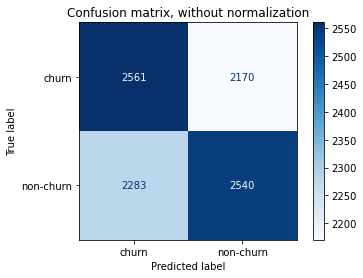

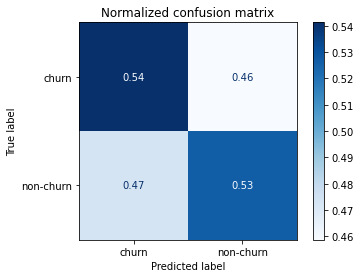

In [ ]:
# plot confusion matrix
np.set_printoptions(precision=2) #determine floating point on matrix

titles_options = [('Confusion matrix, without normalization', None),
                  ('Normalized confusion matrix', 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(tree_clf1, X_test, y_test,
                                 display_labels=churn_target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# f1 and accuracy score
y_pred = tree_clf1.fit(X_train, y_train).predict(X_test)
print('f1 score is :',f1_score(y_test, y_pred))
print('accuracy score is :',accuracy_score(y_test, y_pred))

f1 score is : 0.5228691553064084
accuracy score is : 0.5295817108403467


## MODELS COMPARATION

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',random_state=42)
dt.fit(X_train, y_train)
print('train accuracy: ' + str(accuracy_score(y_train, dt.predict(X_train))))
print('test accuracy: ' + str(accuracy_score(y_test, dt.predict(X_test))))
print('train f1 score: '+str(f1_score(y_train, dt.predict(X_train))))
print('test f1 score: '+str(f1_score(y_test, dt.predict(X_test))))


train accuracy: 0.9998654104979812
test accuracy: 0.5307724513292862
train f1 score: 0.9998638035138693
test f1 score: 0.5285518982017037


In [ ]:
dt = DecisionTreeClassifier(criterion='gini',random_state=42)
dt.fit(X_train, y_train)
print('train accuracy: ' + str(accuracy_score(y_train, dt.predict(X_train))))
print('test accuracy: ' + str(accuracy_score(y_test, dt.predict(X_test))))
print('train f1 score: '+str(f1_score(y_train, dt.predict(X_train))))
print('test f1 score: '+str(f1_score(y_test, dt.predict(X_test))))

train accuracy: 0.9998654104979812
test accuracy: 0.5402972576931129
train f1 score: 0.9998638035138693
test f1 score: 0.5410658307210031


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
dt.fit(X_train, y_train)
print('train accuracy: ' + str(accuracy_score(y_train, dt.predict(X_train))))
print('test accuracy: ' + str(accuracy_score(y_test, dt.predict(X_test))))
print('train f1 score: '+str(f1_score(y_train, dt.predict(X_train))))
print('test f1 score: '+str(f1_score(y_test, dt.predict(X_test))))

train accuracy: 0.5935397039030955
test accuracy: 0.59284069499686
train f1 score: 0.6471687826154685
test f1 score: 0.649738879884747


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4,random_state=42)
dt.fit(X_train, y_train)
print('train accuracy: ' + str(accuracy_score(y_train, dt.predict(X_train))))
print('test accuracy: ' + str(accuracy_score(y_test, dt.predict(X_test))))
print('train f1 score: '+str(f1_score(y_train, dt.predict(X_train))))
print('test f1 score: '+str(f1_score(y_test, dt.predict(X_test))))


train accuracy: 0.5970390309555854
test accuracy: 0.5958760728490684
train f1 score: 0.6502336448598132
test f1 score: 0.6523813811110111


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5,random_state=42)
dt.fit(X_train, y_train)
print('train accuracy: ' + str(accuracy_score(y_train, dt.predict(X_train))))
print('test accuracy: ' + str(accuracy_score(y_test, dt.predict(X_test))))
print('train f1 score: '+str(f1_score(y_train, dt.predict(X_train))))
print('test f1 score: '+str(f1_score(y_test, dt.predict(X_test))))

train accuracy: 0.5982951996410947
test accuracy: 0.5960854092526691
train f1 score: 0.65121533187909
test f1 score: 0.6525614477356623


In [ ]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=6,random_state=42)
dt.fit(X_train, y_train)
print('train accuracy: ' + str(accuracy_score(y_train, dt.predict(X_train))))
print('test accuracy: ' + str(accuracy_score(y_test, dt.predict(X_test))))
print('train f1 score: '+str(f1_score(y_train, dt.predict(X_train))))
print('test f1 score: '+str(f1_score(y_test, dt.predict(X_test))))

train accuracy: 0.6008972633467923
test accuracy: 0.5931546996022609
train f1 score: 0.6491560182994163
test f1 score: 0.6457023060796645


max F score: 0.5960854092526691


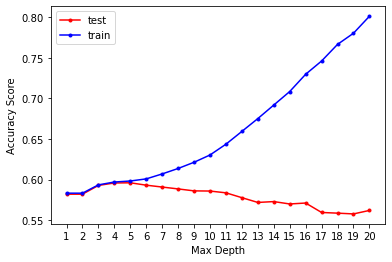

In [ ]:
# plot accuracy scores with different max depth
train_score=list()
test_score=list()

for i in np.arange(1,21):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dt.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, dt.predict(X_train)))
    test_score.append(accuracy_score(y_test, dt.predict(X_test)))

print('max F score:', max(test_score))

plt.plot(np.arange(1,21), test_score, marker='.', color='red', label = 'test')
plt.plot(np.arange(1,21), train_score, marker='.', color='blue',label='train')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.xlim((0,21))
plt.xticks(range(1,21))
plt.show()

max F score: 0.6525614477356623


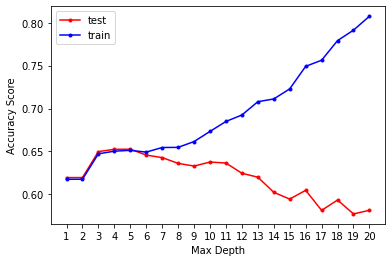

In [ ]:
# plot F scores with different max depth
train_score=list()
test_score=list()

for i in np.arange(1,21):
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dt.fit(X_train, y_train)
    train_score.append(f1_score(y_train, dt.predict(X_train)))
    test_score.append(f1_score(y_test, dt.predict(X_test)))

print('max F score:', max(test_score))

plt.plot(np.arange(1,21), test_score, marker='.', color='red', label = 'test')
plt.plot(np.arange(1,21), train_score, marker='.', color='blue',label='train')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.legend()
plt.xlim((0,21))
plt.xticks(range(1,21))
plt.show()

## FINAL MODEL

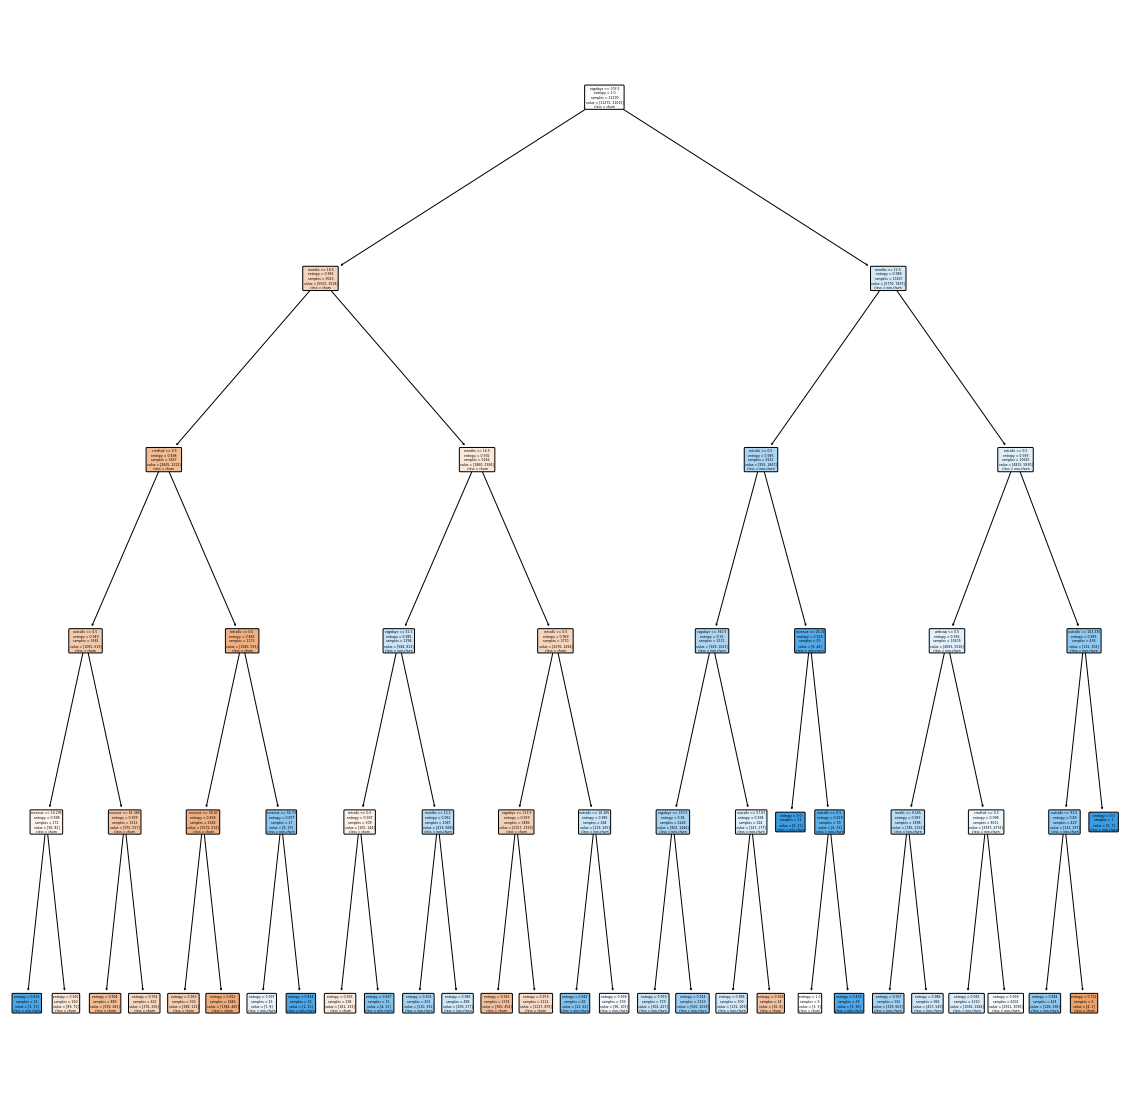

Confusion matrix, without normalization
[[2071 2660]
 [1199 3624]]
Normalized confusion matrix
[[0.44 0.56]
 [0.25 0.75]]


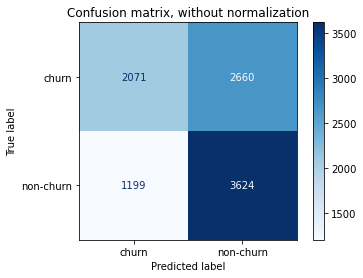

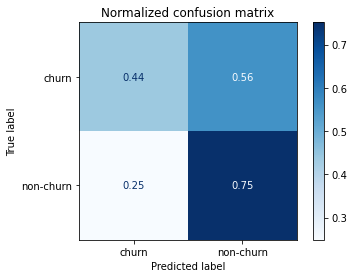

In [ ]:
#ploting the best model we found
# split the data
X_train, X_test, y_train, y_test = train_test_split(churn_data, churn_target, random_state=42, test_size =0.3)

# model training
tree_clf2 = DecisionTreeClassifier(max_depth=5, criterion='entropy').fit(X_train, y_train)

# plot decision tree
fig2 = plt.figure(2,figsize=(20,20))
plot_tree(tree_clf2,
          feature_names = churn_feature_names,
          class_names = churn_target_names,
          rounded = True,
          filled = True)
plt.show()

# plot confusion matrix
np.set_printoptions(precision=2) #determine floating point on matrix

titles_options = [('Confusion matrix, without normalization', None),
                  ('Normalized confusion matrix', 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(tree_clf2, X_test, y_test,
                                 display_labels=churn_target_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [ ]:
# save decision tree figure to local
fig1.savefig('C:/Users/Will Jiang/Desktop/Emory Desktop/BA/Python Script/images/decistion_tree_churn_1.png')